In [1]:
#Here it starts, the heroic path of data hygiene. 

#Might be interesting to check who reports the shark attacks and when, so we could wonder where is the void in reports.
#The data may show that sharks only attack on english spoken territory.
#If data is accurate enough, it could be funny to search at what time does sharks set their tables.
#Might more attacks could be reported a couple years after Jaws was premiered? 1975 is the year.

#SEEMINGLY RELEVANT COLUMNS:
#Tier1: Country, Date, Time, Year 
#Tier2: Name, Area, Location, Activity

#Crucial facts:
#-In 2008 a polar bear jaw was found in a Greenland shark's stomach.
#-This is Mary Lee, the influencer shark: https://twitter.com/maryleeshark

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Hokusai level shark graphics.
import pylab as plt
import seaborn as sns

#This make the graph possible
%matplotlib inline

#Functions
from src.funk import Funk 

In [3]:
#Load messy fishy data from attacks.csv

tibu = pd.read_csv('attacks.csv', encoding= "ISO-8859-1")

In [4]:
tear1 = tibu[['Date', 'Year', 'Country','Time']]
tear2 = tibu[['Name', 'Area', 'Location', 'Activity']]
tears = tibu[['Date', 'Year', 'Country','Time', 'Name', 'Area', 'Location', 'Activity']]

In [5]:
# Null values in columns. Remember that the important ones are as follow:
#Tier1: Country, Date, Time, Year 
#Tier2: Name, Area, Location, Activity
#Originally, the file has 25723 rows

'''nan_cols = tibu.isna().sum()

nan_cols[nan_cols>0]'''

#Irrelevant, as it comes, this file is mainly null values. Let's check it by row. But let's drop duplicates first.

'nan_cols = tibu.isna().sum()\n\nnan_cols[nan_cols>0]'

In [6]:
#Originally, the dataframe had (25723, 24) rows, after dropping duplicates it has (6312, 24)
tibu = tibu.drop_duplicates()

'N nan cols: 24'

Case Number                0.031686
Date                       0.158428
Year                       0.190114
Type                       0.221800
Country                    0.950570
Area                       7.366920
Location                   8.713561
Activity                   8.776933
Name                       3.485425
Sex                        9.109632
Age                       45.009506
Injury                     0.602028
Fatal (Y/N)                8.697719
Time                      53.295311
Species                   45.120406
Investigator or Source     0.427757
pdf                        0.158428
href formula               0.174271
href                       0.158428
Case Number.1              0.158428
Case Number.2              0.158428
original order             0.047529
Unnamed: 22               99.984157
Unnamed: 23               99.968314
dtype: float64

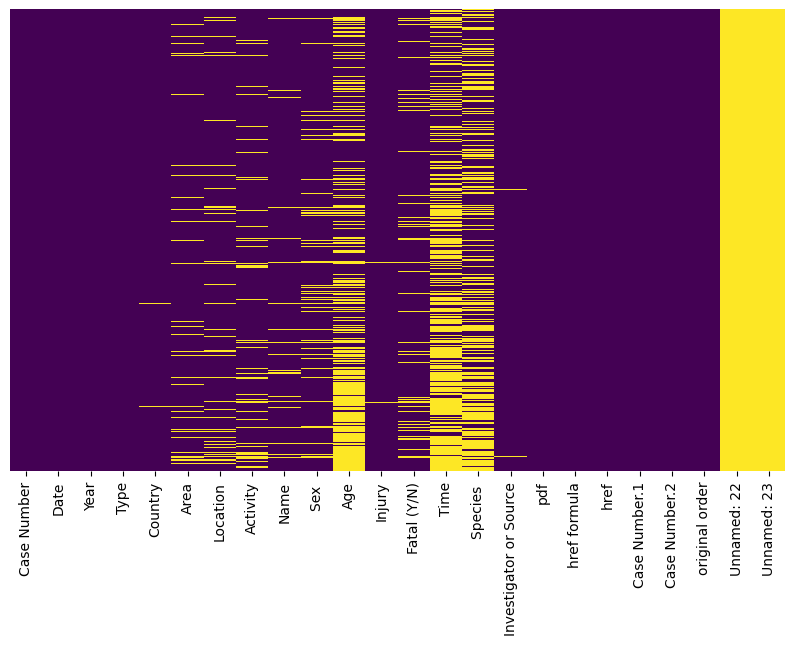

In [7]:
Funk.check_nan(tibu)

In [8]:
#Dropping all rows where Tear1 columns are null. Before (6312, 24), then (6302, 24)
tibu.drop(tibu[(tibu.Country.isna() == 1) & (tibu.Date.isna() == 1) 
                                           & (tibu.Time.isna() == 1)
                                           & (tibu.Year.isna() == 1)].index, axis=0, inplace=True)

In [9]:
tibu.loc[(tibu.Country.isna() == 1) & (tibu.Time.isna() == 1) & (tibu.Name.isna() == 1)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4018,1960.01.26,26-Jan-1960,1960.0,Sea Disaster,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,NaN,NaN,NaN,"As searchers approached wreckage, sharks circl...",N,NaN,NaN,"V.M. Coppleson (1962), p.260",1960.01.26-Portuguese airliner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.01.26,1960.01.26,2285.0,NaN,NaN
4700,1942.11.00.a,Nov-1942,1942.0,Sea Disaster,NaN,Off South American coast,NaN,Dutch merchant ship Zaandam torpedoed by the ...,NaN,M,NaN,FATAL,Y,NaN,NaN,"M. Murphy; V.M. Coppleson (1962), pp.207-208",1942.11.00.a-Izzi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.11.00.a,1942.11.00.a,1603.0,NaN,NaN


In [10]:
#for searching nan values data.cylinders.iloc[[21506]]
#tibu.loc[(tibu.Date.isna() == 1)]
#tibu[['Country', 'Date', 'Time', 'Year']].head(40)